<a href="https://colab.research.google.com/github/NancyAmer0/Classification/blob/main/Titanic_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score, roc_curve


# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

In [ ]:
import math

In [ ]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

#Read Data

In [ ]:
df = pd.read_csv('/content/titanic.csv')

#EDA

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
(df.isna().sum()/len(df))*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
#null values
#features need to be encoded

#UVA

##Survived

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


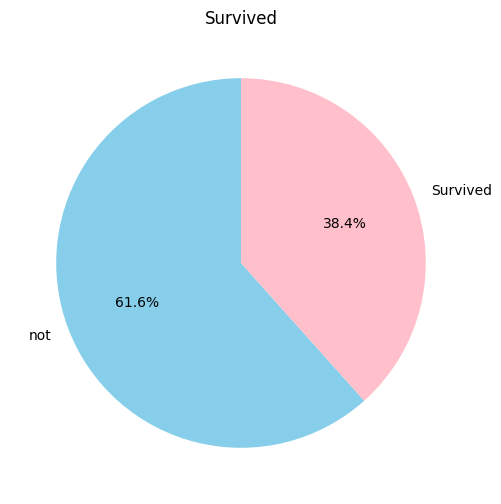

In [ ]:
labels = ['not', 'Survived']
Survived = df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Survived, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title("Survived")
plt.show()

##Pclass

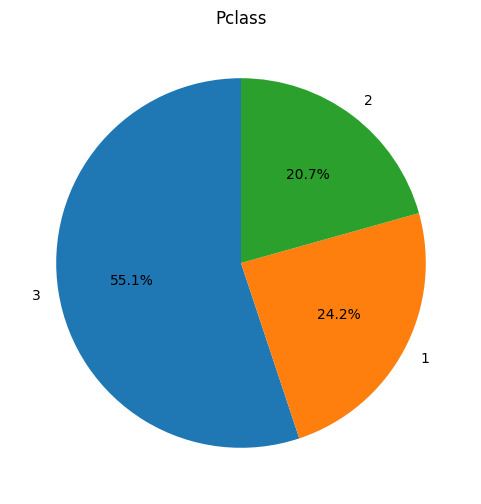

In [ ]:
labels = df['Pclass'].value_counts().index.tolist()
sizes = df['Pclass'].value_counts().values

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Pclass")
plt.show()

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


##Name

In [ ]:
df['Name'].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
##title can be extracted

##Sex

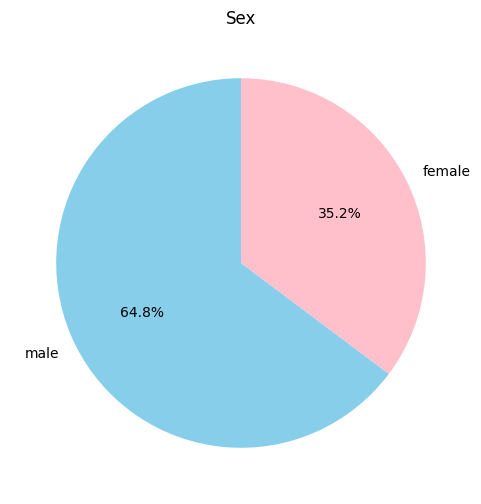

In [ ]:
labels = df['Sex'].value_counts().index.tolist()
Survived = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Survived, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title("Sex")
plt.show()

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


##Age,SibSp,Parch,Fare

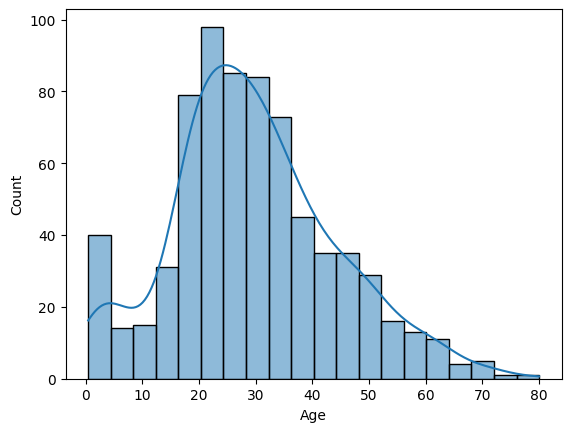

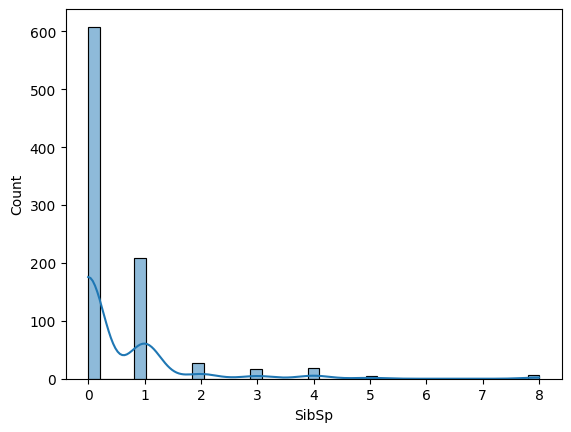

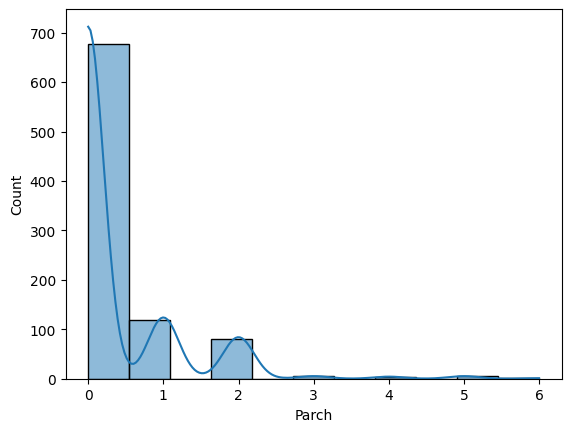

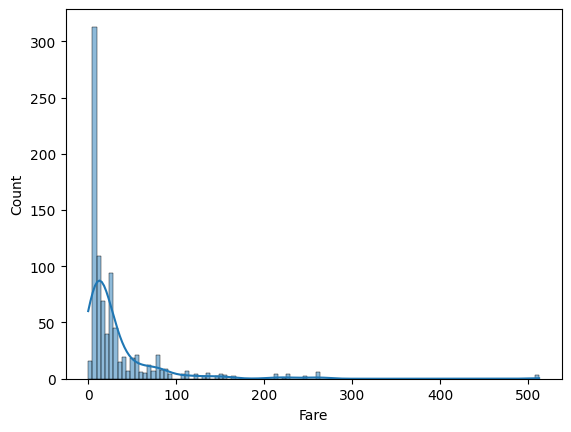

In [ ]:
df2 = df[['Age','SibSp','Parch','Fare']]
for i in df2.columns:
  sns.histplot(data=df, x=i, kde=True)
  plt.show()

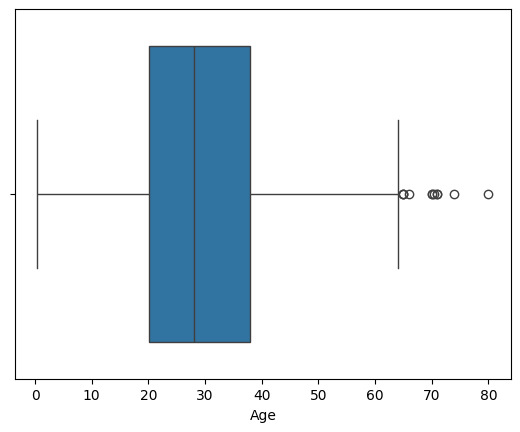

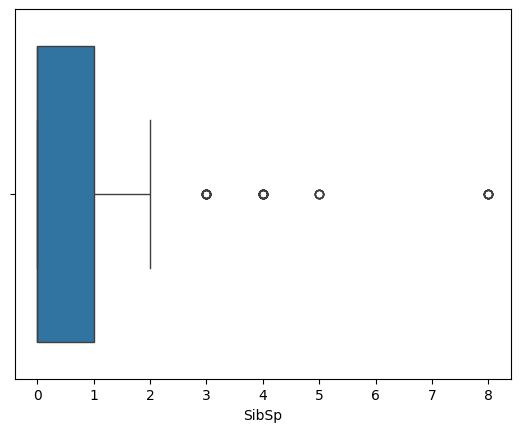

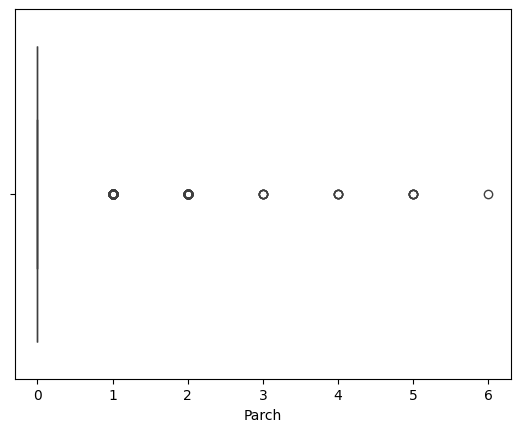

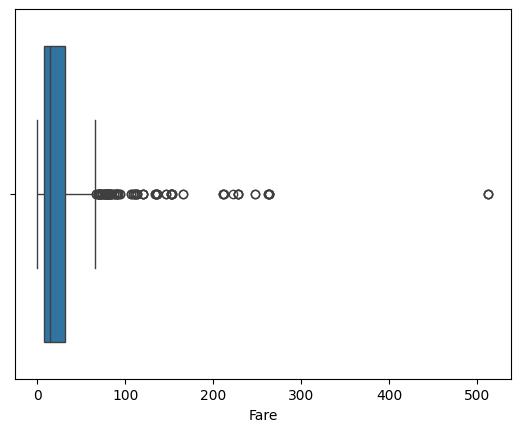

In [ ]:
df2 = df[['Age','SibSp','Parch','Fare']]
for i in df2.columns:
  sns.boxplot(data=df, x=i)
  plt.show()

##Ticket

In [ ]:
df['Ticket'].nunique()

681

##Cabin

In [ ]:
df['Cabin'].head(10)

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
5,NaN
6,E46
7,NaN
8,NaN
9,NaN


In [ ]:
df['Cabin'].nunique()

147

##Embarked

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

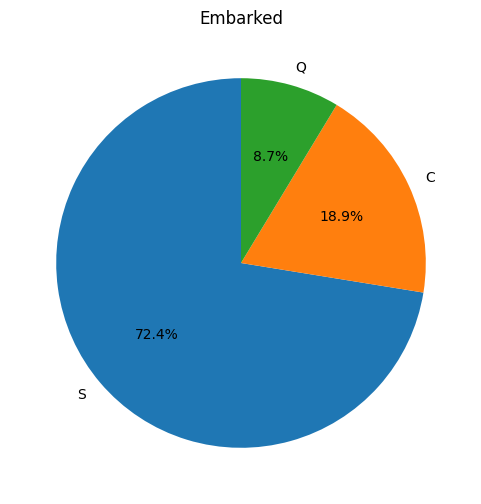

In [ ]:
labels = df['Embarked'].value_counts().index.tolist()
sizes = df['Embarked'].value_counts().values

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Embarked")
plt.show()

#BVA

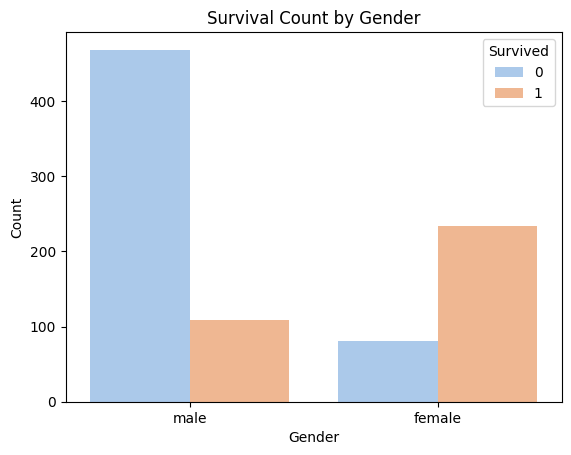

In [ ]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


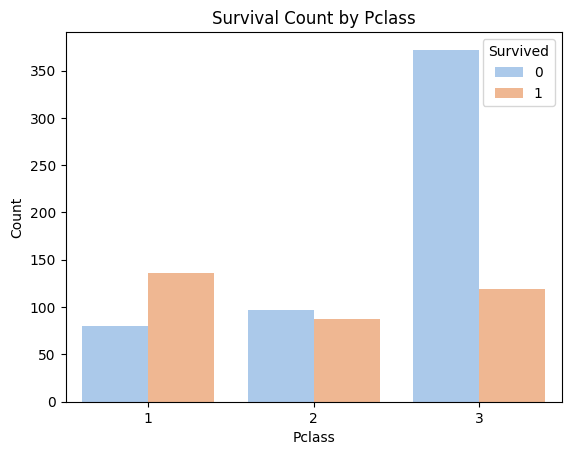

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

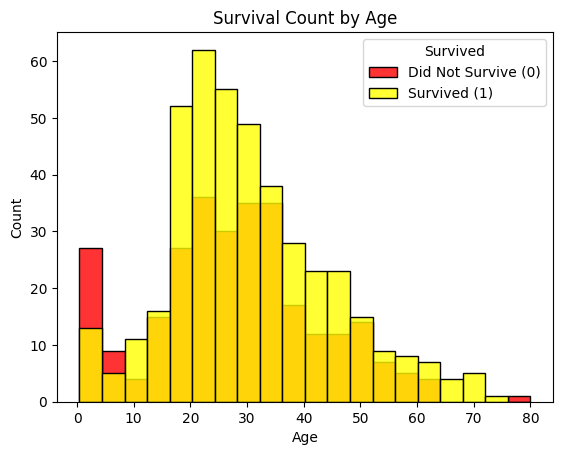

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', palette={0: "yellow", 1: "red"}, alpha=0.8)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive (0)', 'Survived (1)'], loc='upper right')
plt.show()

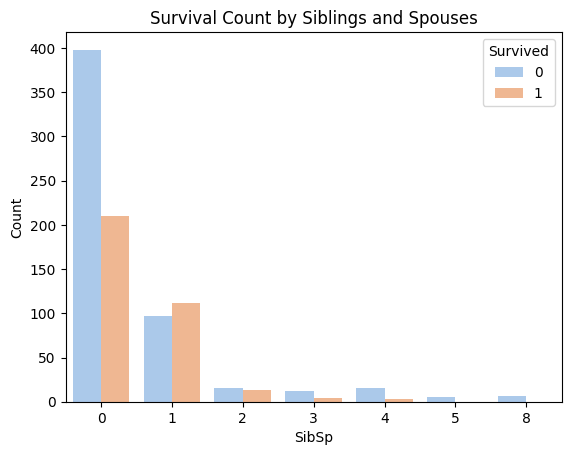

In [ ]:
sns.countplot(data=df, x='SibSp', hue='Survived', palette='pastel')
plt.title('Survival Count by Siblings and Spouses')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

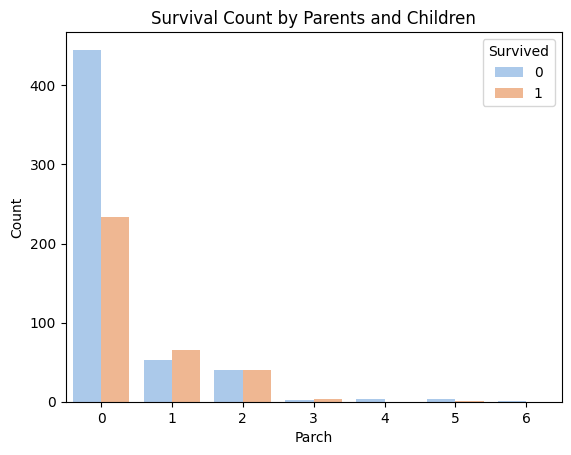

In [ ]:
sns.countplot(data=df, x='Parch', hue='Survived', palette='pastel')
plt.title('Survival Count by Parents and Children')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

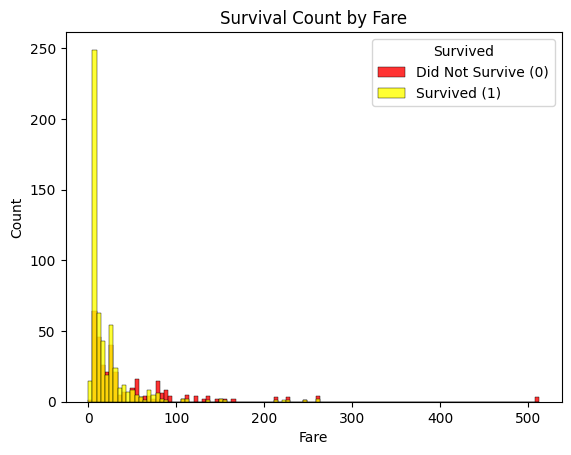

In [ ]:
sns.histplot(data=df, x='Fare', hue='Survived', palette={0: "yellow", 1: "red"}, alpha=0.8)
plt.title('Survival Count by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive (0)', 'Survived (1)'], loc='upper right')
plt.show()

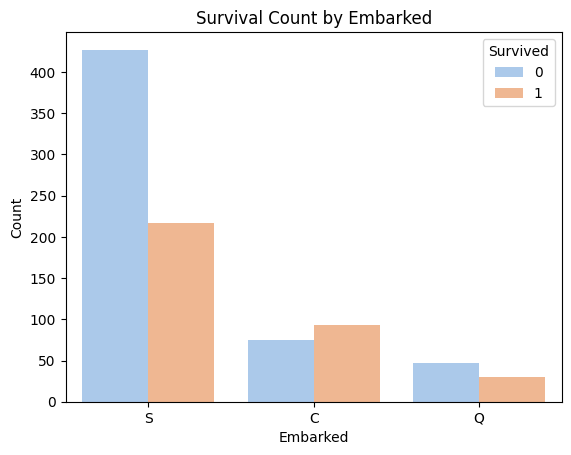

In [ ]:
sns.countplot(data=df, x='Embarked', hue='Survived', palette='pastel')
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

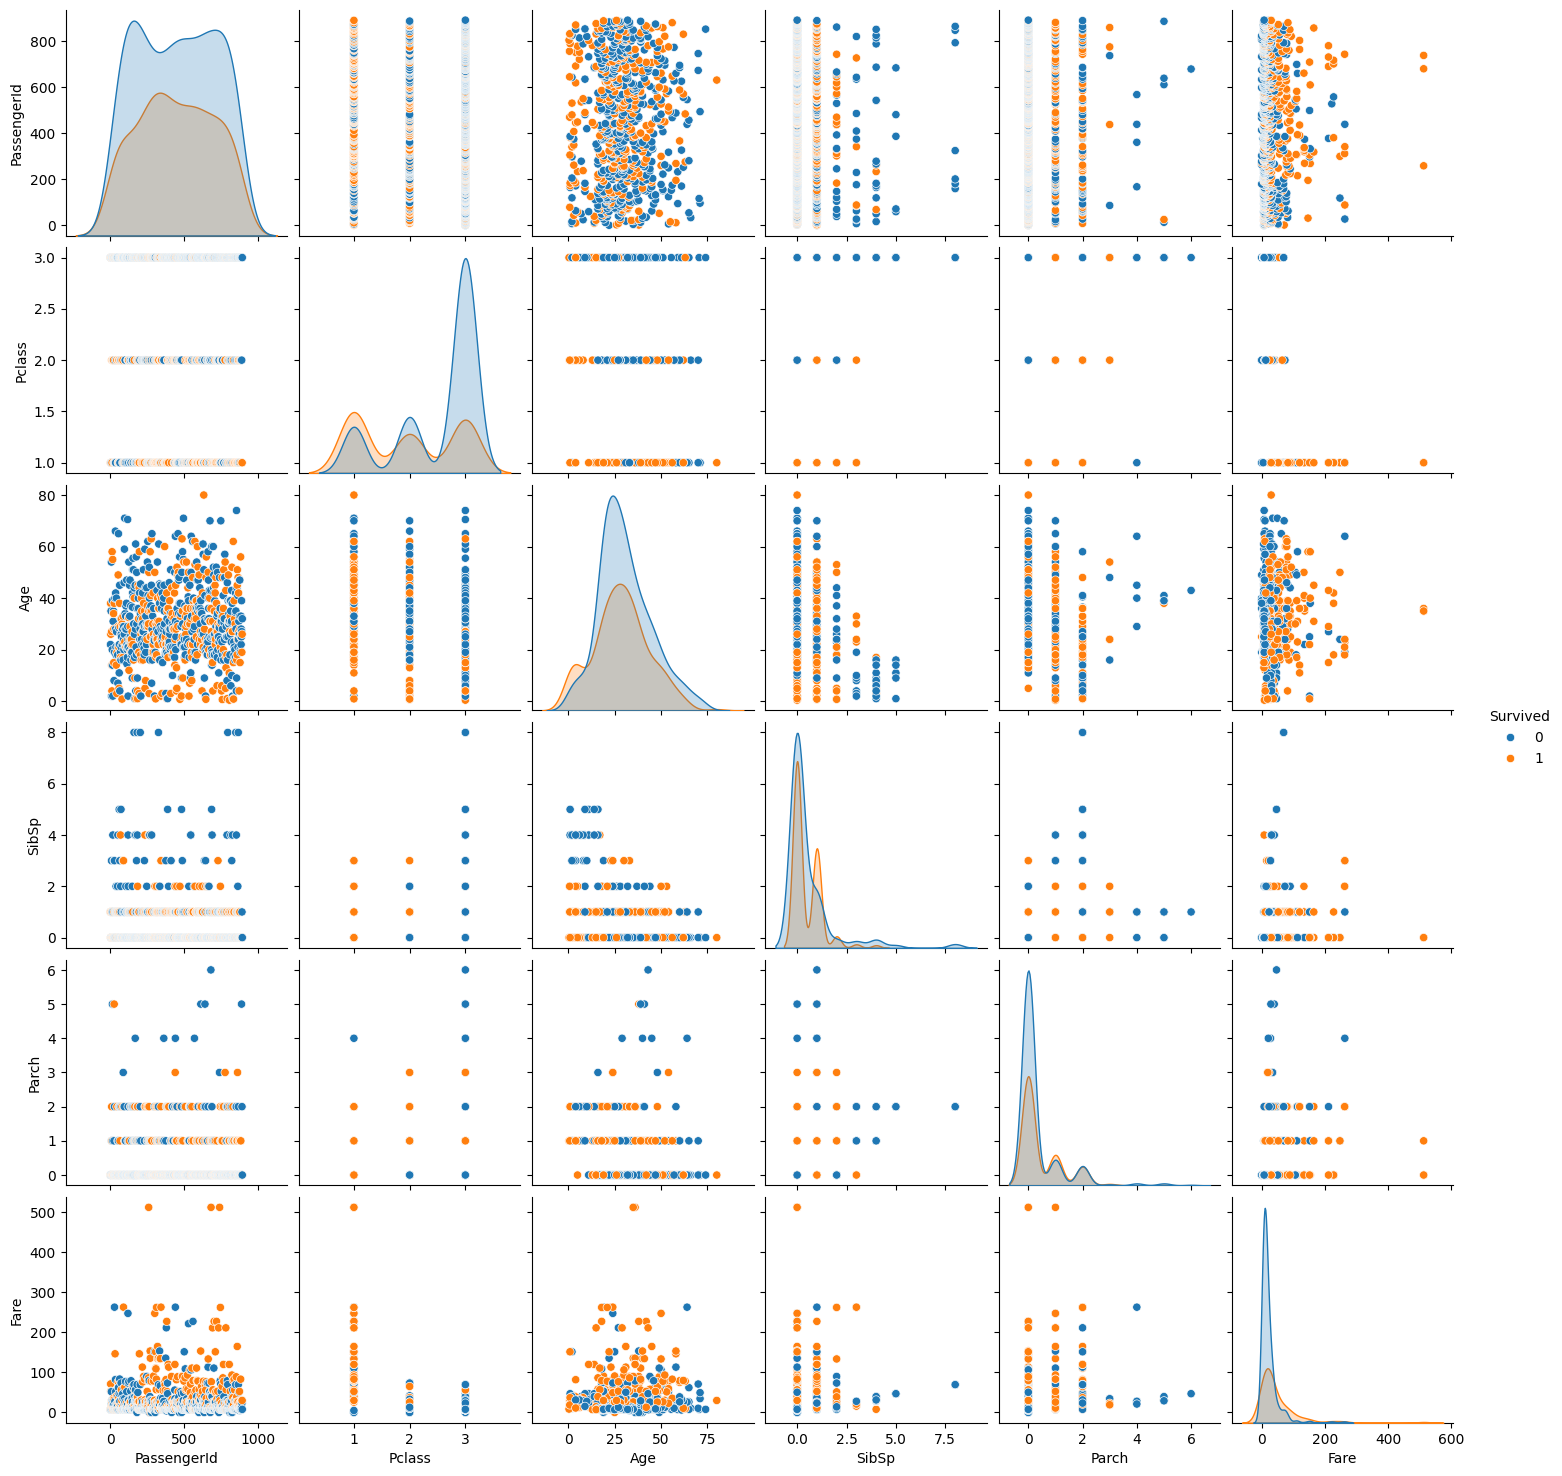

In [ ]:
sns.pairplot(df, hue='Survived')
plt.show()

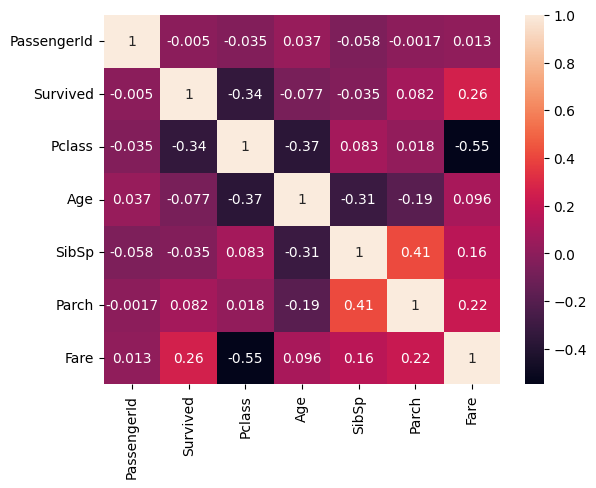

In [ ]:
corr_df = df.select_dtypes(include='number')
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

#Preprocessing

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##null treatment

In [ ]:
#drop 'PassengerId', 'Ticket', not informative
#drop 'Cabin', many nulls

In [ ]:
df.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

##Outliers

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
print(df[df['Age']<lower_bound].shape[0])
print(df[df['Age']>upper_bound].shape[0])

24
42


In [ ]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
print(df[df['SibSp']<lower_bound].shape[0])
print(df[df['SibSp']>upper_bound].shape[0])

0
46


In [ ]:
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
print(df[df['Parch']<lower_bound].shape[0])
print(df[df['Parch']>upper_bound].shape[0])

0
213


In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
print(df[df['Fare']<lower_bound].shape[0])
print(df[df['Fare']>upper_bound].shape[0])

0
116


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#Encoding

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
enc_data = encoder.fit_transform(df[['Sex', 'Embarked']])
enc_df = pd.DataFrame(enc_data, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

print(enc_df)

     Sex_male  Embarked_Q  Embarked_S
0         1.0         0.0         1.0
1         0.0         0.0         0.0
2         0.0         0.0         1.0
3         0.0         0.0         1.0
4         1.0         0.0         1.0
..        ...         ...         ...
886       1.0         0.0         1.0
887       0.0         0.0         1.0
888       0.0         0.0         1.0
889       1.0         0.0         0.0
890       1.0         1.0         0.0

[891 rows x 3 columns]


In [ ]:
df = pd.concat([df,enc_df], axis=1)
df.drop(['Sex','Embarked'], axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1.0,0.0,1.0


#Feature Engineering

In [ ]:
#extract the labels from the name feature

In [ ]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
df.drop('Name', axis=1, inplace=True)

In [ ]:
enc_data = encoder.fit_transform(df[['Title']])
enc_df = pd.DataFrame(enc_data, columns=encoder.get_feature_names_out(['Title']))
df = pd.concat([df,enc_df], axis=1)

In [ ]:
df.groupby('Title')['Survived'].value_counts()

Title         Survived
Capt          0             1
Col           0             1
              1             1
Don           0             1
Dr            0             4
              1             3
Jonkheer      0             1
Lady          1             1
Major         0             1
              1             1
Master        1            23
              0            17
Miss          1           127
              0            55
Mlle          1             2
Mme           1             1
Mr            0           436
              1            81
Mrs           1            99
              0            26
Ms            1             1
Rev           0             6
Sir           1             1
the Countess  1             1
Name: count, dtype: int64

In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
categories_to_keep = ['Mr', 'Miss', 'Mrs', 'Master']

df['Title'] = df['Title'].apply(lambda x: x if x in categories_to_keep else 'Other')

df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other':4})

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

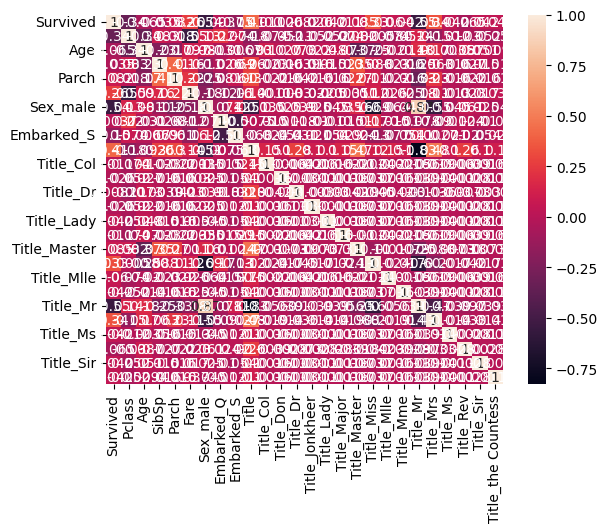

In [ ]:
sns.heatmap(df.corr(), annot=True)

#Splitting

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

#Logistic Model

In [ ]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_train = lr.predict(x_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8330658105939005

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       384
           1       0.80      0.75      0.78       239

    accuracy                           0.83       623
   macro avg       0.83      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623



In [ ]:
y_pred_test = lr.predict(x_test_scaled)
accuracy_score(y_test, y_pred_test)

0.835820895522388

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       165
           1       0.80      0.77      0.78       103

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.83      0.84      0.84       268



#SVM

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
svm = SVC(random_state=42)
svm.fit(x_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
y_pred_train = svm.predict(x_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8475120385232745

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       384
           1       0.83      0.75      0.79       239

    accuracy                           0.85       623
   macro avg       0.84      0.83      0.84       623
weighted avg       0.85      0.85      0.85       623



In [ ]:
y_pred_test = svm.predict(x_test_scaled)
accuracy_score(y_test, y_pred_test)

0.8283582089552238

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       165
           1       0.79      0.76      0.77       103

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



#Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_train = dt.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.9807383627608347

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       384
           1       1.00      0.95      0.97       239

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623



<Axes: >

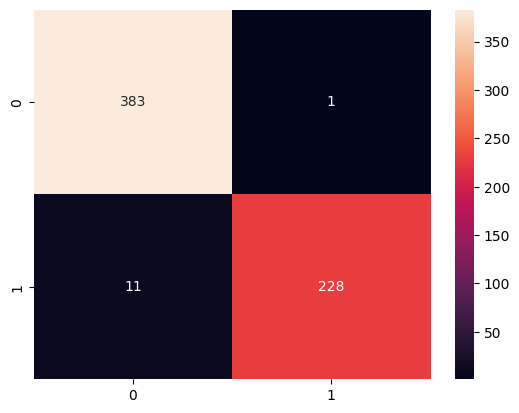

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt="d")

In [ ]:
y_pred_test = dt.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.7873134328358209

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       165
           1       0.73      0.72      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



<Axes: >

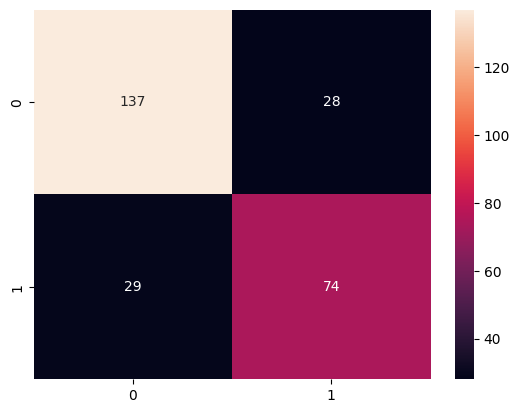

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d")

In [ ]:
#overfitted

#Grid Search

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Reduced range for regularization strength
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3]
    }

In [ ]:
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
best_svm = grid_search.best_estimator_

y_pred_train = best_svm.predict(x_train_scaled)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8443017656500803

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       384
           1       0.87      0.70      0.77       239

    accuracy                           0.84       623
   macro avg       0.85      0.82      0.83       623
weighted avg       0.85      0.84      0.84       623



In [ ]:
y_pred_test = best_svm.predict(x_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       165
           1       0.82      0.67      0.74       103

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



In [ ]:
accuracy_score(y_test, y_pred_test)

0.8171641791044776